In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### python built-in Module about time
https://mp.weixin.qq.com/s/9jr_QoM1xgYPe_unizfqSw

**时间戳（特指 unix 时间戳) Timestamp** 是指在一连串的数据中加入辨识文字，如时间或者日期等，用以保障本地数据更新顺序和远程的一致。

unix时间戳是指从1970年1月1日（UTC/GMT的午夜）开始所经过的秒数，不包括闰秒。1970-01-01就是经常我们在MySQL中时间为空的时候，转化空的时间戳之后得到的时间。

|时间|秒|
|---|---|
|1分钟| 60 |
|1小时| 3600|
|1天| 86400|
|1周| 604800|
|1月(30.44天）|2629743|
|1年(365.24天）|31556763|

#### 时间戳转换网站
https://tool.chinaz.com/tools/unixtime.aspx

https://tool.lu/timestamp/

https://www.sojson.com/unixtime.html

https://c.runoob.com/front-end/852

http://www.beijing-time.org/shijianchuo

#### calendar

In [5]:
import calendar

# c: 每月间隔距离；w:每日宽度间隔（日期左右宽度）， l:每星期行数(上下宽度）， 每行宽度= 21*w+18+3*c, 3个月1行
year = calendar.calendar(2021, w = 3, l = 1, c = 8)
print(year)

                                               2021

          January                            February                            March
Mon Tue Wed Thu Fri Sat Sun        Mon Tue Wed Thu Fri Sat Sun        Mon Tue Wed Thu Fri Sat Sun
                  1   2   3          1   2   3   4   5   6   7          1   2   3   4   5   6   7
  4   5   6   7   8   9  10          8   9  10  11  12  13  14          8   9  10  11  12  13  14
 11  12  13  14  15  16  17         15  16  17  18  19  20  21         15  16  17  18  19  20  21
 18  19  20  21  22  23  24         22  23  24  25  26  27  28         22  23  24  25  26  27  28
 25  26  27  28  29  30  31                                            29  30  31

           April                               May                                June
Mon Tue Wed Thu Fri Sat Sun        Mon Tue Wed Thu Fri Sat Sun        Mon Tue Wed Thu Fri Sat Sun
              1   2   3   4                              1   2              1   2   3   4   5   6
  5 

In [6]:
# determine the leap year
print(calendar.isleap(2020))
print(calendar.isleap(2000))
print(calendar.isleap(1900))

True
True
False


In [9]:
# how many leap years between y1(incl.) and y2(not incl.)
calendar.leapdays(2000,2020)    # 2000， 04， 08， 12， 16
calendar.leapdays(2000,2021)    # 2000， 04， 08， 12， 16， 2020

5

6

In [13]:
# month(year, month, w, l)
print(calendar.month(2021, 3, w=4, l=2))

            March 2021

Mon  Tue  Wed  Thu  Fri  Sat  Sun

  1    2    3    4    5    6    7

  8    9   10   11   12   13   14

 15   16   17   18   19   20   21

 22   23   24   25   26   27   28

 29   30   31




In [18]:
# monthcalendar(year, month)
# 通过列表形式返回某年某月日历。每个子列表是一个星期，从星期一开始
#如果没有出现本月的日期用 0 表示。
ls = calendar.monthcalendar(2021,3)
ls[0]

[1, 2, 3, 4, 5, 6, 7]

In [21]:
# monthrange(year, month)
# 返回一个元组，两个数值(a,b), a 表示该月从星期几开始，0-6， 6表示星期天，
# b 表示该月总共有多少天
calendar.monthrange(2020, 2)

(5, 29)

In [22]:
# weekday(year, month, day)
# 输入年月日，得到星期几，0-6,6表示星期天
calendar.weekday(2021, 3, 7)

6

#### time

In [33]:
# time.time() 获取当前时间的时间戳
import time 
time.time()

1615091767.9242094

In [34]:
# time.localtime() 打印当前的时间，结果是时间元组
time.localtime()

time.struct_time(tm_year=2021, tm_mon=3, tm_mday=7, tm_hour=12, tm_min=36, tm_sec=8, tm_wday=6, tm_yday=66, tm_isdst=0)

In [35]:
t = time.localtime()
t.tm_year
t.tm_mon
t.tm_mday
t.tm_wday

2021

3

7

6

In [36]:
# 指定某个时间戳
t = time.localtime(1000000000)
t

time.struct_time(tm_year=2001, tm_mon=9, tm_mday=9, tm_hour=9, tm_min=46, tm_sec=40, tm_wday=6, tm_yday=252, tm_isdst=0)

In [56]:
# mktime() 以时间元组为参数，返回时间戳，是localtime()的逆过程
tsp = time.localtime()
time.mktime(tsp)

1615094941.0

In [39]:
# gmtime() 国际时间，最好是格林威治时间
time.gmtime()
time.localtime()

time.struct_time(tm_year=2021, tm_mon=3, tm_mday=7, tm_hour=4, tm_min=36, tm_sec=50, tm_wday=6, tm_yday=66, tm_isdst=0)

time.struct_time(tm_year=2021, tm_mon=3, tm_mday=7, tm_hour=12, tm_min=36, tm_sec=50, tm_wday=6, tm_yday=66, tm_isdst=0)

In [50]:
# asctime() 参数为空时，默认时以time.localtime()的值为参数，返回当前日期、时间、星期。
# 参数为时间元组
time.asctime()

# 指定参数，通过localtime()方法得到一个时间元组
dt = time.localtime(1000000000)
time.asctime(dt)

# 当前时间戳转换为时间元组，时间元组再通过asctime()转换为具体日期
time.asctime(time.localtime(time.time()))

time.asctime(time.localtime())

'Sun Mar  7 13:24:20 2021'

'Sun Sep  9 09:46:40 2001'

'Sun Mar  7 13:24:20 2021'

'Sun Mar  7 13:24:20 2021'

In [53]:
# ctime()的参数默认是一个时间戳
time.ctime()
time.ctime(110000000)

'Sun Mar  7 13:25:32 2021'

'Wed Jun 27 11:33:20 1973'

In [ ]:
# strftime() 按照指定的格式将时间元组转化为字符串，缺省为当前时间localtime()

|格式|含义|取值范围(样式)|
|---|---|---|
|%y|去掉世纪的年份| 00-99,如"21"|
|%Y|完整的年份| 如"2021"|
|%j|指定的日期是一年中的第几天|001-366|
|%m|月份| 01-12,如"03"|
|%b|本地简化月份名称|简写的英文月份|
|%B|本地完整月份名称|完整的英文月份|
|%d|改月的第几日|每月1日为“01”|
|%H|第几小时，24小时制|00-23|
|%h|第几小时，12小时制|00-12|
|%M|分钟|00-59|
|%S|秒|00-59|
|%p|上下午|AM, PM|
|%U|该年中第几个星期，周日为一周的起点|00-53|
|%W|同上，周一为一周的起点|00-53|
|%w|一个星期中第几天|0-6|
|%Z|时区|大陆是CST|
|%x|日期|日/月/年|
|%X|日期时间|日/月/年时/分/秒|
|%%|%字符|%|

In [75]:
time.strftime("%Y-%B-%d %j")
time.strftime("%Y-%m-%d %j %H:%M:%S")
time.strftime("%Y-%m-%d %W %H:%M:%S")

'2021-March-07 066'

'2021-03-07 066 22:09:54'

'2021-03-07 09 22:09:54'

In [60]:
# strptime 将字符串转化为时间元组
dt2 = time.strftime("%y-%m-%d")
dt2
time.strptime(dt2,"%y-%m-%d")

'21-03-07'

time.struct_time(tm_year=2021, tm_mon=3, tm_mday=7, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=6, tm_yday=66, tm_isdst=-1)

#### datetime

datetime 模块中几个常用的类如下：

- date: 日期类，常用属性: year/month/day

- time: 时间类，常用属性: hour/minute/second/microsecond

- datetime: 日期时间类

- timedelta: 时间间隔

- tzinfo: 时区类

##### date 类

In [19]:
import datetime

today = datetime.date.today()
today     #today是一个日期对象(date object)

print(f"当前日期：{today}")
print(f'当前日期(字符串)：{today.ctime()}')
print(f'时间元组信息：{today.timetuple()}')
print(f'当前日期(字符串)：{today.strftime("%Y-%m-%d %H:%M:%S")}')
print(f'年: {today.year}')
print(f'月: {today.month}')
print(f'日: {today.day}')
print(f'星期: {today.weekday()}')
print(f'公历序数: {today.toordinal()}')
print(f'年/周数/星期: {today.isocalendar()}')    #返回一个元组（年，周数，星期）

datetime.date(2021, 3, 7)

当前日期：2021-03-07
当前日期(字符串)：Sun Mar  7 00:00:00 2021
时间元组信息：time.struct_time(tm_year=2021, tm_mon=3, tm_mday=7, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=6, tm_yday=66, tm_isdst=-1)
当前日期(字符串)：2021-03-07 00:00:00
年: 2021
月: 3
日: 7
星期: 6
公历序数: 737856
年/周数/星期: (2021, 9, 7)


In [11]:
tdy_ordinal = today.toordinal()
tdy_ordinal
print(datetime.date.fromordinal(tdy_ordinal))

737856

2021-03-07


In [12]:
import time
tsp = time.time()
print(datetime.date.fromtimestamp(tsp))

2021-03-07


In [25]:
# 修改日期用replace方法
d1 = datetime.date(2021,3,7)
print(d1)
d2 = d1.replace(2021,8,8)
print(d2)
d3 = d1.replace(year = 2022, month = 2, day = 28)
print(d3)

2021-03-07
2021-08-08
2022-02-28


##### time 类

In [26]:
from datetime import time
t = time(10,20,30,40)
t.hour
t.minute
t.second
t.microsecond

10

20

30

40

##### datetime 类

datetime类包含date类和time类的全部信息

In [36]:
from datetime import datetime
from datetime import date 

print(datetime.today())
print(datetime.now())
print(datetime.utcnow())    # 返回当前UTC日期和时间的datetime对象
print(datetime.fromtimestamp(1600000000))    #时间戳的datetime对象
print(datetime.fromordinal(737900)) 
print(datetime.combine(date(2021,3,7), time(20,36,1)))
print(datetime.strptime("2021-03-07", "%Y-%m-%d"))

2021-03-07 20:40:24.174652
2021-03-07 20:40:24.175033
2021-03-07 12:40:24.175106
2020-09-13 20:26:40
2021-04-20 00:00:00
2021-03-07 20:36:01
2021-03-07 00:00:00


In [1]:
from datetime import datetime
datetime(year = 2020, month = 9, day = 8)

datetime.datetime(2020, 9, 8, 0, 0)

In [2]:
datetime(2020, 9,8, 11,1)

datetime.datetime(2020, 9, 8, 11, 1)

##### timedelta 类

两个日期（date）或者日期时间（datetime）之间的差；
支持参数：weeks, days, hours, minutes, seconds, milliseconds, microseconds

In [37]:
from datetime import timedelta, date, time

d = date.today()
print(d + timedelta(days = 7))

2021-03-14


In [42]:
now = datetime.today()
print(now)
print(now + timedelta(microseconds = 100))
print(now + timedelta(milliseconds = 50))
print(now + timedelta(weeks=2))

2021-03-07 20:51:47.830560
2021-03-07 20:51:47.830660
2021-03-07 20:51:47.880560
2021-03-21 20:51:47.830560


In [47]:
delta = datetime(2021,3,7) - datetime(2021,2,28,20,12)
print(delta)
delta.days
delta.seconds
delta.total_seconds()    #全部转成秒

6 days, 3:48:00


6

13680

532080.0

##### tzinfo 类

datetime类有一个时区属性tzinfo。

tzinfo是一个关于时区信息的类，是一个抽象的类，不能直接被实例化来使用。

它的默认值是None，无法区分具体是哪个时区，需要我们强制指定一个后才能使用。


In [48]:
from datetime import date, datetime, timedelta, timezone

tz_utc_8 = timezone(timedelta(hours = 8))    #创建时区
print(tz_utc_8)

UTC+08:00


In [49]:
now = datetime.now()
print(now)
new_time = now.replace(tzinfo = tz_utc_8)
print(new_time)

2021-03-07 21:01:21.016816
2021-03-07 21:01:21.016816+08:00


##### 时区的切换

In [54]:
# utcnow()获取到当前的utc时间
utc_now = datetime.utcnow().replace(tzinfo = timezone.utc)    #指定utc时区
print(utc_now)

# astimezone() 切换到东八区
beijing = utc_now.astimezone(timezone(timedelta(hours=8)))
print(beijing)

# 同样地切到东九区
tokyo = utc_now.astimezone(timezone(timedelta(hours = 9)))
print(tokyo)

# 北京时间直接切到东京时间
tokyo_new = beijing.astimezone(timezone(timedelta(hours = 9)))
print(tokyo_new)

2021-03-07 13:09:56.140474+00:00
2021-03-07 21:09:56.140474+08:00
2021-03-07 22:09:56.140474+09:00
2021-03-07 22:09:56.140474+09:00


#### 常用时间转化

##### 时间戳转化为日期

- time.localtime() : 将时间戳转成时间元组形式

- time.strftime() : 将时间元组数据转成需要的形式

In [57]:
import time
now_tsp = time.time()    #获取当前时间的时间戳

now_tuple = time.localtime(now_tsp)    #转成时间元组
time.strftime("%Y/%B/%d %H:%M:%S",now_tuple)    #转成指定格式

'2021/March/07 21:26:28'

In [66]:
tsp = 1620030000    #指定时间戳

t_tuple = time.localtime(tsp)    #获取时间元组形式数据
print(f"时间元组数据：{t_tuple}")
time.strftime("%Y/%B/%d %H:%M:%S",t_tuple)    #格式化

时间元组数据：time.struct_time(tm_year=2021, tm_mon=5, tm_mday=3, tm_hour=16, tm_min=20, tm_sec=0, tm_wday=0, tm_yday=123, tm_isdst=0)


'2021/May/03 16:20:00'

In [68]:
# 如果不想指定具体的格式，只想获取时间戳对应的时间，直接通过time.ctime()
time.ctime(1701852741)


'Wed Dec  6 16:52:21 2023'

##### 日期时间转化成时间戳

- strptime() : 将date转换成时间元组形式

- mktime() : 将时间元组转换成时间戳

In [70]:
date = "2021-3-7 21:44:40"

date_array = time.strptime(date, "%Y-%m-%d %H:%M:%S")
print(f"时间元组：{date_array}")
time.mktime(date_array)

时间元组：time.struct_time(tm_year=2021, tm_mon=3, tm_mday=7, tm_hour=21, tm_min=44, tm_sec=40, tm_wday=6, tm_yday=66, tm_isdst=-1)


1615124680.0

##### 格式化时间

- strptime() : 将时间转化为时间元组

- strftime() : 重新格式化时间

In [78]:
old = "2021-1-1 21:50:50"
time_tuple = time.strptime(old,"%Y-%m-%d %H:%M:%S")    # 转化为时间元组
new = time.strftime("%Y%m%d %U %H:%M:%S", time_tuple)

print(f"原格式时间：{old}")
print(f"新格式时间：{new}")

原格式时间：2021-1-1 21:50:50
新格式时间：20210101 00 21:50:50


##### 指定格式获取当前时间

In [73]:
old_time = time.time()
time_tuple = time.localtime(old_time)
new_time = time.strftime("%Y/%m%/%d %H:%M:%S", time_tuple)
print(new_time)

2021/03/07 21:56:18


#### python dateutil module

In [3]:
from dateutil import parser
date = parser.parse('8th of September, 2020')    # parse to a datetime.datetime object
date

datetime.datetime(2020, 9, 8, 0, 0)

Complete strftime() behavior

file:///C:/work2/python-3.7.7-docs-html/library/datetime.html?highlight=datetime#strftime-strptime-behavior

### Numpy datetime64

- datetime64数据类型将日期时间编码成一个64位整数。

In [6]:
import numpy as np

date= np.array('2020-09-08', dtype=np.datetime64)
date

array('2020-09-08', dtype='datetime64[D]')

In [7]:
date + np.arange(12)

array(['2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11',
       '2020-09-12', '2020-09-13', '2020-09-14', '2020-09-15',
       '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-19'],
      dtype='datetime64[D]')

### Pandas Timestamp

In [8]:
import pandas as pd 
date = pd.to_datetime('8th of September, 2020')
date

Timestamp('2020-09-08 00:00:00')

In [9]:
date.strftime('%A')

'Tuesday'

In [10]:
date + pd.to_timedelta(np.arange(14), 'D')

DatetimeIndex(['2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11',
               '2020-09-12', '2020-09-13', '2020-09-14', '2020-09-15',
               '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-19',
               '2020-09-20', '2020-09-21'],
              dtype='datetime64[ns]', freq=None)

#### 时间索引

In [11]:
t_index = pd.DatetimeIndex(['2020-09-06', '2020-09-07','2020-09-08','2020-09-09'])
data = pd.Series([0,1,2,3], index=t_index)
data

2020-09-06    0
2020-09-07    1
2020-09-08    2
2020-09-09    3
dtype: int64

In [12]:
data['2020-09-05':'2020-09-08']    #时间切片的数据

2020-09-06    0
2020-09-07    1
2020-09-08    2
dtype: int64

In [13]:
data['2020']    #得到全年数据

2020-09-06    0
2020-09-07    1
2020-09-08    2
2020-09-09    3
dtype: int64

#### Pandas 时间序列数据结构

- 时间戳： Pandas提供**Timestamp数据类型**。它是构建在numpy.datetime64数据类型之上的。**对应的索引结构是DatetimeIndex**。
- 时间周期： Pandas提供了**Period数据类型**。它是构建在numpy.datetime64基础上编码了一个固定周期间隔的时间。**对应的索引结构是PeriodIndex**.
- 时间差或持续时间： Pandas提供了**Timedelta数据类型**。构建于numpy.datetime64基础上。**对应的索引结构是TimedeltaIndex**。

- 虽然这些对象可以直接被创建，但是更通用的做法是使用pd.to_datetime()函数，改函数可以将多种格式的字符串解析成日期时间。

- 将一个日期时间传递给pd.to_datetime()函数会得到一个Timestamp对象，将系一列日期时间传递过去得到DatetimeIndex对象。

In [14]:
dates = pd.to_datetime([datetime(2020,9,6), '7th Sep, 2020', '2020-September-8', '20200909', '9/11/2020'])
dates

DatetimeIndex(['2020-09-06', '2020-09-07', '2020-09-08', '2020-09-09',
               '2020-09-11'],
              dtype='datetime64[ns]', freq=None)

- 任何DatetimeIndex对象都能使用to_period()函数转换成PeriodIndex对象，需要额外指定一个频率的参数码。

In [15]:
dates.to_period('D')

PeriodIndex(['2020-09-06', '2020-09-07', '2020-09-08', '2020-09-09',
             '2020-09-11'],
            dtype='period[D]', freq='D')

- TimedeltaIndex对象可以通过日期时间相减来创建，例如：


In [16]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '5 days'], dtype='timedelta64[ns]', freq=None)

#### Pandas 规则的日期时间序列

- pd.date_range()创建时间戳序列；
- pd.period_range()创建周期序列；
- pd.timedelta_range()创建时间差序列。

In [17]:
pd.date_range('2020-09-07', '2020-09-11')    #默认的周期为1天

DatetimeIndex(['2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11'],
              dtype='datetime64[ns]', freq='D')

In [18]:
pd.date_range('2020-09-06', periods = 8)    #开始时间和持续值

DatetimeIndex(['2020-09-06', '2020-09-07', '2020-09-08', '2020-09-09',
               '2020-09-10', '2020-09-11', '2020-09-12', '2020-09-13'],
              dtype='datetime64[ns]', freq='D')

In [19]:
pd.date_range('2020-09-08', periods=12, freq='H')    #以小时为间隔单位的时间范围

DatetimeIndex(['2020-09-08 00:00:00', '2020-09-08 01:00:00',
               '2020-09-08 02:00:00', '2020-09-08 03:00:00',
               '2020-09-08 04:00:00', '2020-09-08 05:00:00',
               '2020-09-08 06:00:00', '2020-09-08 07:00:00',
               '2020-09-08 08:00:00', '2020-09-08 09:00:00',
               '2020-09-08 10:00:00', '2020-09-08 11:00:00'],
              dtype='datetime64[ns]', freq='H')

In [20]:
pd.period_range('2020-09', periods =12, freq = 'M')    #以月为单位的时间周期序列

PeriodIndex(['2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
             '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08'],
            dtype='period[M]', freq='M')

In [21]:
pd.timedelta_range(0, periods = 13, freq= 'H')      #以小时为单位的持续时间序列

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00',
                '10:00:00', '11:00:00', '12:00:00'],
               dtype='timedelta64[ns]', freq='H')

#### 频率和偏移值

In [22]:
pd.timedelta_range(0, periods = 9, freq = '2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

- 上述短的符号码实际上是**Pandas时间序列偏移值**的对象实例的别名。可以在pd.tseries.offsets模块中找到这些偏移值实例。

In [23]:
from pandas.tseries.offsets import BDay
pd.date_range('2020-09-30', periods = 7, freq= BDay())

DatetimeIndex(['2020-09-30', '2020-10-01', '2020-10-02', '2020-10-05',
               '2020-10-06', '2020-10-07', '2020-10-08'],
              dtype='datetime64[ns]', freq='B')

#### 重新取样、移动和窗口

In [24]:
from pandas_datareader import data

In [25]:
goog = data.DataReader('GOOG', start= '2010', end = '2021', data_source='yahoo')
goog.tail

<bound method NDFrame.tail of                    High          Low         Open        Close      Volume  \
Date                                                                         
2009-12-31   311.532288   308.832428   311.208527   308.832428   2448700.0   
2010-01-04   313.579620   310.954468   312.304413   312.204773   3927000.0   
2010-01-05   312.747742   309.609497   312.418976   310.829926   6031900.0   
2010-01-06   311.761444   302.047852   311.761444   302.994293   7987100.0   
2010-01-07   303.861053   295.218445   303.562164   295.940735  12876600.0   
...                 ...          ...          ...          ...         ...   
2020-09-01  1665.729980  1632.219971  1636.630005  1660.709961   1826700.0   
2020-09-02  1733.180054  1666.329956  1673.775024  1728.280029   2511200.0   
2020-09-03  1709.713989  1615.060059  1709.713989  1641.839966   3107800.0   
2020-09-04  1645.109985  1547.613037  1624.260010  1591.040039   2608600.0   
2020-09-08  1563.864990  1528.0100

In [26]:
goog = goog['Close']
goog.tail

<bound method NDFrame.tail of Date
2009-12-31     308.832428
2010-01-04     312.204773
2010-01-05     310.829926
2010-01-06     302.994293
2010-01-07     295.940735
                 ...     
2020-09-01    1660.709961
2020-09-02    1728.280029
2020-09-03    1641.839966
2020-09-04    1591.040039
2020-09-08    1532.390015
Name: Close, Length: 2690, dtype: float64>

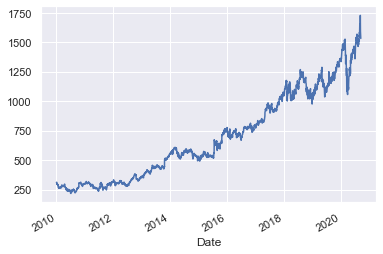

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
goog.plot()

#### 重新采样和改变频率

对数据根据更高或更低的频率重新取样。这可以通过resample()或更简单的asfreq()方法来实现。
resample()主要进行**数据聚合**操作，而asfreq()主要进行**数据选择**操作。

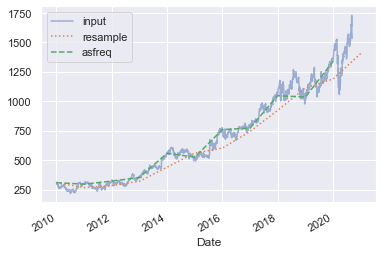

In [30]:
goog.plot(alpha = 0.5, style = '-')
goog.resample('BA').mean().plot(style=':')    # resample()返回了这一年度的平均值
goog.asfreq('BA').plot(style = '--')    #asfreq()返回了年末的收市值
plt.legend(['input', 'resample', 'asfreq'], loc = 'upper left')

In [32]:
goog_resample = goog.resample('BA').mean()
goog_resample

Date
2009-12-31     308.832428
2010-12-31     266.811472
2011-12-30     283.424738
2012-12-31     320.208021
2013-12-31     440.470378
2014-12-31     559.803290
2015-12-31     602.005681
2016-12-30     743.486707
2017-12-29     921.780837
2018-12-31    1113.225134
2019-12-31    1188.393057
2020-12-31    1405.043262
Freq: BA-DEC, Name: Close, dtype: float64

In [33]:
goog_asfreq = goog.asfreq('BA')
goog_asfreq

Date
2009-12-31     308.832428
2010-12-31     295.875977
2011-12-30     321.744019
2012-12-31     352.369232
2013-12-31     558.262512
2014-12-31     524.958740
2015-12-31     758.880005
2016-12-30     771.820007
2017-12-29    1046.400024
2018-12-31    1035.609985
2019-12-31    1337.020020
Freq: BA-DEC, Name: Close, dtype: float64

#### 将工作日频率扩展为自然日频率（包括周末）

C:\work2\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support 'b' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
C:\work2\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
C:\work2\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
C:\work2\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support 'k' instances.
A proxy artist may be use

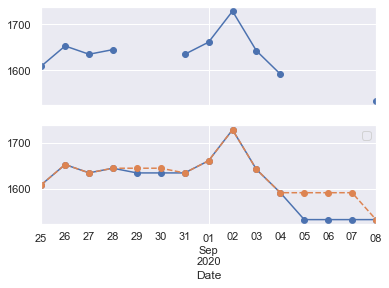

In [34]:
fig, ax = plt.subplots(2, sharex = True)
data = goog.tail(10)

data.asfreq('D').plot(ax=ax[0], marker = 'o')
data.asfreq('D', method = 'bfill').plot(ax = ax[1], style = '-o')
data.asfreq('D', method = 'ffill').plot(ax = ax[1], style = '--o')
ax[1].legend("back-fill", "forward-fill")